In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import date
import datetime as dt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

from sklearn.model_selection import train_test_split


In [11]:
train_df = pd.read_csv('/content/fraudTrain.csv')
test_df = pd.read_csv('/content/fraudTest.csv')

train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [14]:
print(test_df.shape),print(train_df.shape)

(555719, 23)
(623939, 23)


(None, None)

In [15]:
train_df.isnull().sum(), test_df.isnull().sum()

(Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    1
 zip                      1
 lat                      1
 long                     1
 city_pop                 1
 job                      1
 dob                      1
 trans_num                1
 unix_time                1
 merch_lat                1
 merch_long               1
 is_fraud                 1
 dtype: int64,
 Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip 

In [16]:
test_df.info(), train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

(None, None)

In [17]:
# Assuming your datetime column is named 'trans_date_trans_time'
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])

train_df['year'] = train_df['trans_date_trans_time'].dt.year
train_df['month'] = train_df['trans_date_trans_time'].dt.month
train_df['day'] = train_df['trans_date_trans_time'].dt.day
train_df['hour'] = train_df['trans_date_trans_time'].dt.hour
train_df['minute'] = train_df['trans_date_trans_time'].dt.minute

# Do the same for the 'test' DataFrame
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])

test_df['year'] = test_df['trans_date_trans_time'].dt.year
test_df['month'] = test_df['trans_date_trans_time'].dt.month
test_df['day'] = test_df['trans_date_trans_time'].dt.day
test_df['hour'] = test_df['trans_date_trans_time'].dt.hour

train_df['dob'] = pd.to_datetime(train_df['dob'])
train_df['age'] = (train_df['trans_date_trans_time'] - train_df['dob']).dt.days // 365 # Assuming 'trans_date_trans_time' is already datetime

test_df['dob'] = pd.to_datetime(test_df['dob'])
test_df['age'] = (test_df['trans_date_trans_time'] - test_df['dob']).dt.days // 365


**checking for balance of dataset**

<class 'pandas.core.frame.DataFrame'>
Index: 1179658 entries, 0 to 623938
Data columns (total 29 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1179658 non-null  int64         
 1   trans_date_trans_time  1179658 non-null  datetime64[ns]
 2   cc_num                 1179658 non-null  int64         
 3   merchant               1179658 non-null  object        
 4   category               1179658 non-null  object        
 5   amt                    1179658 non-null  float64       
 6   first                  1179658 non-null  object        
 7   last                   1179658 non-null  object        
 8   gender                 1179658 non-null  object        
 9   street                 1179658 non-null  object        
 10  city                   1179658 non-null  object        
 11  state                  1179657 non-null  object        
 12  zip                    1179657 non

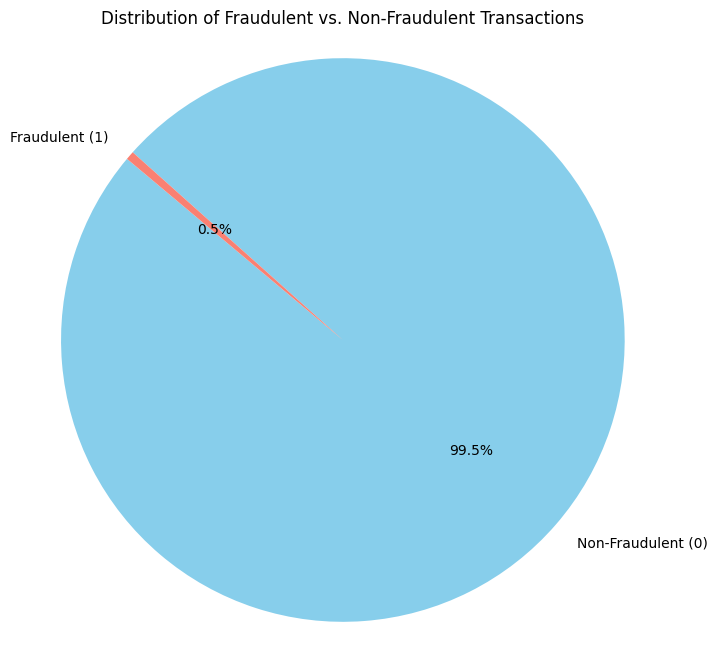

In [18]:
total = pd.concat([test_df,train_df])
total.info()
#check for balance of the dataset

# Get the counts of fraudulent and non-fraudulent transactions
fraud_counts = total['is_fraud'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=['Non-Fraudulent (0)', 'Fraudulent (1)'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [19]:
train_df = train_df.drop(['first', 'last', 'gender', 'street', 'city', 'state', 'zip', ], axis=1)
test_df = test_df.drop(['first', 'last', 'gender', 'street', 'city', 'state', 'zip'], axis=1)
train_df = train_df.drop(['cc_num', 'unix_time', 'trans_num', 'Unnamed: 0','merch_lat',	'merch_long'], axis=1)
test_df = test_df.drop(['cc_num', 'unix_time', 'trans_num', 'Unnamed: 0','merch_lat',	'merch_long'], axis=1)

In [20]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'train_df' is your DataFrame
# Select only object type columns which are typically categorical
categorical_cols = train_df.select_dtypes(include=['object']).columns

encoder = LabelEncoder()

for col in categorical_cols:
  train_df[col] = encoder.fit_transform(train_df[col])

# Now, your selected categorical columns in 'train_df' DataFrame are label encoded.
# You can display the first few rows to see the changes
train_df.head()

# Do the same for the 'test_df' DataFrame
categorical_cols_test = test_df.select_dtypes(include=['object']).columns # Use a different variable name

encoder_test = LabelEncoder() # Use a different encoder instance for test

for col in categorical_cols_test:
  test_df[col] = encoder_test.fit_transform(test_df[col]) # Fit and transform on test

# Now, your selected categorical columns in 'test_df' DataFrame are label encoded.
# You can display the first few rows to see the changes
test_df.head()

,trans_date_trans_time,merchant,category,amt,lat,long,city_pop,job,dob,is_fraud,year,month,day,hour,age
0,2020-06-21 12:14:25,319,10,2.86,33.9659,-80.9355,333497,275,1968-03-19,0,2020,6,21,12,52
1,2020-06-21 12:14:33,591,10,29.84,40.3207,-110.4360,302,392,1990-01-17,0,2020,6,21,12,30
2,2020-06-21 12:14:53,611,5,41.28,40.6729,-73.5365,34496,259,1970-10-21,0,2020,6,21,12,49
3,2020-06-21 12:15:15,222,9,60.05,28.5697,-80.8191,54767,407,1987-07-25,0,2020,6,21,12,32
4,2020-06-21 12:15:17,292,13,3.19,44.2529,-85.0170,1126,196,1955-07-06,0,2020,6,21,12,65


In [21]:
train_df = train_df.drop(['trans_date_trans_time', 'dob','minute'], axis=1)
test_df = test_df.drop(['trans_date_trans_time', 'dob'], axis=1)

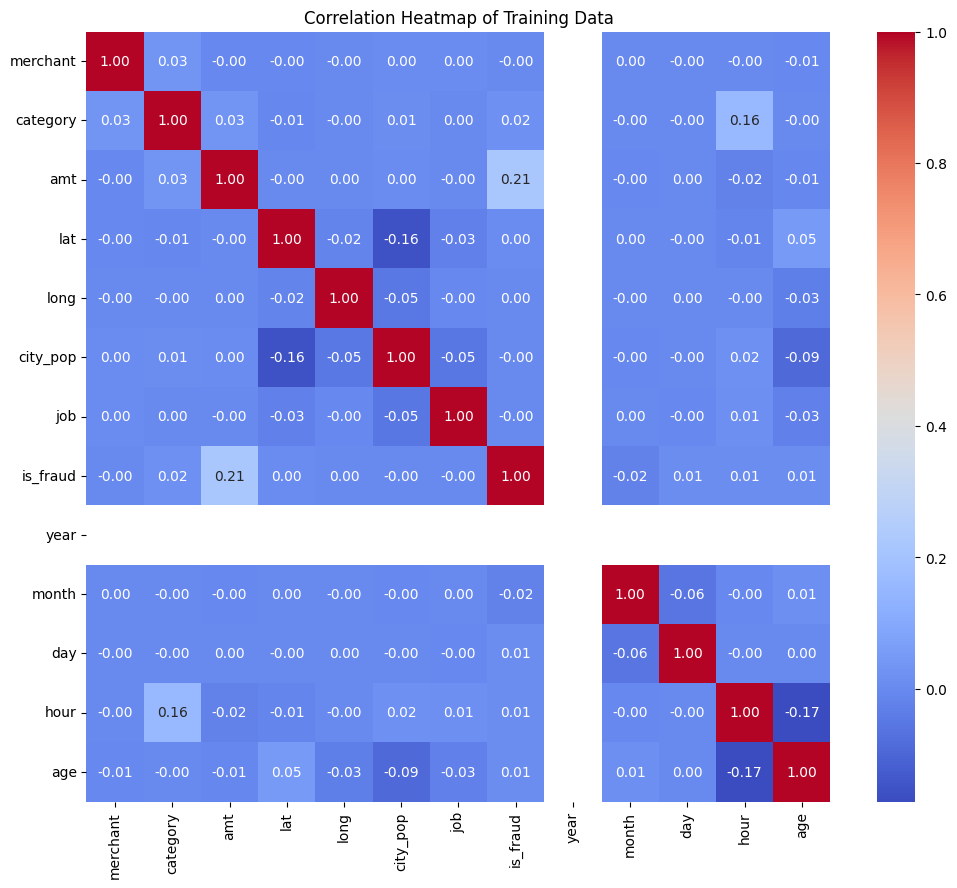

In [22]:
# Assuming 'train_df' is your DataFrame
correlation_matrix = train_df.corr()

plt.figure(figsize=(12, 10)) # You can adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Training Data')
plt.show()

**CATBOOST**

In [23]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    f1_score, roc_auc_score, classification_report, confusion_matrix
)


ModuleNotFoundError: No module named 'catboost'

In [ ]:
#catboost
# Ensure target column exists
if 'is_fraud' not in train_df.columns or 'is_fraud' not in test_df.columns:
    raise ValueError("Target column 'is_fraud' is missing.")

# Separate features and target
X_full_train = train_df.drop('is_fraud', axis=1)
y_full_train = train_df['is_fraud']

X_test_cb = test_df.drop('is_fraud', axis=1)
y_test_cb = test_df['is_fraud']



In [ ]:
# Keep only common columns and ensure same order
common_cols = [col for col in X_full_train.columns if col in X_test_cb.columns]
X_full_train = X_full_train[common_cols]
X_test_cb = X_test_cb[common_cols]

# Sanity check
if not all(X_full_train.columns == X_test_cb.columns):
    print("Warning: Column mismatch between train and test. Re-aligning strictly.")
    X_test_cb = X_test_cb[X_full_train.columns]

# Summary
print(f"\nTraining shape: {X_full_train.shape}")
print(f"Test shape: {X_test_cb.shape}")
print("Features used:", X_full_train.columns.tolist())



Training shape: (1296675, 12)
Test shape: (555719, 12)
Features used: ['merchant', 'category', 'amt', 'lat', 'long', 'city_pop', 'job', 'year', 'month', 'day', 'hour', 'age']


In [ ]:
# Define your categorical columns
user_defined_label_encoded_cat_cols = ['merchant', 'category', 'job']

# Filter for valid columns
valid_cat_cols = [col for col in user_defined_label_encoded_cat_cols if col in X_full_train.columns]
cat_features_indices = [X_full_train.columns.get_loc(col) for col in valid_cat_cols]

# Warnings for missing columns
missing = set(user_defined_label_encoded_cat_cols) - set(valid_cat_cols)
if missing:
    print(f"Warning: These categorical columns were not found: {missing}")

print(f"\nCategorical Features: {valid_cat_cols}")
print(f"Indices for CatBoost: {cat_features_indices}")



Categorical Features: ['merchant', 'category', 'job']
Indices for CatBoost: [0, 1, 6]


In [ ]:
# Split with stratification for class balance
X_train, X_eval, y_train, y_eval = train_test_split(
    X_full_train, y_full_train, test_size=0.15, stratify=y_full_train, random_state=42
)

# Distribution check
print(f"\nTrain shape: {X_train.shape}, Eval shape: {X_eval.shape}")
print(f"Train class distribution: {y_train.value_counts().to_dict()}")
if y_train.value_counts().get(1, 0) == 0:
    print("Warning: No positive (fraud) samples in training data.")



Train shape: (1102173, 12), Eval shape: (194502, 12)
Train class distribution: {0: 1095793, 1: 6380}


In [ ]:
# Initialize CatBoost with class balancing
#cb_model_no_tune = CatBoostClassifier(
    #iterations=1000,
   # learning_rate=0.05,
   # depth=6,
   # l2_leaf_reg=3,
   # auto_class_weights='Balanced',
   # random_seed=42,
   # verbose=100,
   # eval_metric='F1'
#)

from catboost import CatBoostClassifier

cb_model_no_tune = CatBoostClassifier(
    iterations=2000,
    learning_rate=0.02,
    depth=8,
    l2_leaf_reg=7,
    random_strength=1.0,
    bagging_temperature=3.0,
    rsm=0.7,  # use 70% of features at each split
    auto_class_weights='Balanced',   # or use scale_pos_weight=1095793//6380 (~171)
    eval_metric='F1',
    early_stopping_rounds=50,
    use_best_model=True,
    random_seed=42, # It's good practice to include a random seed for reproducibility
    verbose=100 # Keep verbose to see training progress
)
# Set categorical features
if cat_features_indices:
    cb_model_no_tune.set_params(cat_features=cat_features_indices)

# Train model
print("\nTraining CatBoost model...")
cb_model_no_tune.fit(
    X_train, y_train,
    eval_set=(X_eval, y_eval),
    early_stopping_rounds=50
)

# Report best iteration
best_iter = cb_model_no_tune.get_best_iteration()
best_f1 = cb_model_no_tune.get_evals_result()['validation']['F1'][-1]
print(f"\nTraining complete. Best Iteration: {best_iter}, Best Eval F1: {best_f1:.4f}")



Training CatBoost model...
0:	learn: 0.9311539	test: 0.9305163	best: 0.9305163 (0)	total: 1.72s	remaining: 57m 25s
100:	learn: 0.9686481	test: 0.9688887	best: 0.9688887 (100)	total: 2m 51s	remaining: 53m 51s
200:	learn: 0.9781445	test: 0.9756802	best: 0.9757106 (193)	total: 5m 57s	remaining: 53m 20s
300:	learn: 0.9827030	test: 0.9785108	best: 0.9785108 (300)	total: 9m 43s	remaining: 54m 52s
400:	learn: 0.9854326	test: 0.9806443	best: 0.9806443 (400)	total: 12m 9s	remaining: 48m 27s
500:	learn: 0.9871450	test: 0.9816426	best: 0.9816426 (500)	total: 15m 2s	remaining: 44m 59s
600:	learn: 0.9886589	test: 0.9825696	best: 0.9825747 (597)	total: 17m 57s	remaining: 41m 47s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9830812121
bestIteration = 624

Shrink model to first 625 iterations.

Training complete. Best Iteration: 624, Best Eval F1: 0.9830


In [ ]:
print("\n--- Evaluation on Full Training Set ---")
train_preds = cb_model_no_tune.predict(X_full_train)
train_proba = cb_model_no_tune.predict_proba(X_full_train)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_full_train, train_preds))
print("\nClassification Report:")
print(classification_report(y_full_train, train_preds, target_names=['Non-Fraud (0)', 'Fraud (1)'], zero_division=0))

try:
    auc_train = roc_auc_score(y_full_train, train_proba)
    print(f"ROC AUC (Train): {auc_train:.4f}")
except ValueError as e:
    print(f"Could not calculate ROC AUC: {e}")



--- Evaluation on Full Training Set ---
Confusion Matrix:
[[1270951   18218]
 [     77    7429]]

Classification Report:
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.99      0.99   1289169
    Fraud (1)       0.29      0.99      0.45      7506

     accuracy                           0.99   1296675
    macro avg       0.64      0.99      0.72   1296675
 weighted avg       1.00      0.99      0.99   1296675

ROC AUC (Train): 0.9992


In [ ]:
#evalutaion
print("\n--- Evaluation on Test Set ---")
test_preds = cb_model_no_tune.predict(X_test_cb)
test_proba = cb_model_no_tune.predict_proba(X_test_cb)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test_cb, test_preds))
print("\nClassification Report:")
print(classification_report(y_test_cb, test_preds, target_names=['Non-Fraud (0)', 'Fraud (1)'], zero_division=0))

try:
    auc_test = roc_auc_score(y_test_cb, test_proba)
    print(f"ROC AUC (Test): {auc_test:.4f}")
except ValueError as e:
    print(f"Could not calculate ROC AUC: {e}")



--- Evaluation on Test Set ---
Confusion Matrix:
[[539027  14547]
 [    50   2095]]

Classification Report:
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.97      0.99    553574
    Fraud (1)       0.13      0.98      0.22      2145

     accuracy                           0.97    555719
    macro avg       0.56      0.98      0.60    555719
 weighted avg       1.00      0.97      0.98    555719

ROC AUC (Test): 0.9964


In [ ]:
print("\n--- Feature Importances ---")
try:
    importances = cb_model_no_tune.get_feature_importance(prettified=True)
    print(importances)
except Exception as e:
    print(f"Could not retrieve feature importances: {e}")



--- Feature Importances ---
   Feature Id  Importances
0         amt    42.289234
1    category    22.295608
2        hour    10.807051
3         age     7.248696
4    city_pop     4.452497
5    merchant     3.930162
6       month     1.873397
7         day     1.816933
8         job     1.549157
9         lat     1.498117
10       long     1.228290
11       year     1.010857


In [ ]:
#autoencoder

In [26]:
!pip install kera_tuner


ERROR: Could not find a version that satisfies the requirement kera_tuner (from versions: none)
ERROR: No matching distribution found for kera_tuner


In [24]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn utilities
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, confusion_matrix, roc_auc_score
)

# TensorFlow / Keras for autoencoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [27]:
# Assuming 'is_fraud' is your target variable column name
X_full_train = train_df.drop('is_fraud', axis=1)
y_full_train = train_df['is_fraud']

X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']

# We'll use the entire training set for filtering in the autoencoder part,
# so no need to split X_full_train further here for now.
X_train, y_train = X_full_train, y_full_train

print(X_train.shape)
print(X_test.shape)
X_train.columns


(623939, 12)
(555719, 12)


Index(['merchant', 'category', 'amt', 'lat', 'long', 'city_pop', 'job', 'year',
       'month', 'day', 'hour', 'age'],
      dtype='object')

In [28]:
X_test.head()

,merchant,category,amt,lat,long,city_pop,job,year,month,day,hour,age
0,319,10,2.86,33.9659,-80.9355,333497,275,2020,6,21,12,52
1,591,10,29.84,40.3207,-110.4360,302,392,2020,6,21,12,30
2,611,5,41.28,40.6729,-73.5365,34496,259,2020,6,21,12,49
3,222,9,60.05,28.5697,-80.8191,54767,407,2020,6,21,12,32
4,292,13,3.19,44.2529,-85.0170,1126,196,2020,6,21,12,65


In [29]:

X_train_normal = X_train[y_train == 0]

# Scale data
scaler_ae = MinMaxScaler()
X_train_normal_scaled = scaler_ae.fit_transform(X_train_normal)
X_test_scaled = scaler_ae.transform(X_test)

# Get number of features
input_dim = X_train_normal_scaled.shape[1]
print(X_train_normal_scaled.shape)

(620280, 12)


In [31]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np


# Define encoding dim
encoding_dim_1 = 10
encoding_dim_2 = 6
bottleneck_dim = 3

output_activation = 'sigmoid' aled

# --- Encoder ---
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim_1, activation='relu')(input_layer)
encoder = Dropout(0.1)(encoder)
encoder = Dense(encoding_dim_2, activation='relu')(encoder)
encoder = Dropout(0.1)(encoder)
encoder = Dense(bottleneck_dim, activation='relu', name='bottleneck_layer')(encoder)

# --- Decoder ---
decoder = Dense(encoding_dim_2, activation='relu')(encoder)
decoder = Dropout(0.1)(decoder)
decoder = Dense(encoding_dim_1, activation='relu')(decoder)
decoder = Dropout(0.1)(decoder)
output_layer = Dense(input_dim, activation=output_activation)(decoder)

# --- Autoencoder Model ---
autoencoder = Model(inputs=input_layer, outputs=output_layer)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck_layer (Dense)        │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │            70 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 12)             │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 443 (1.73 KB)

 Trainable params: 443 (1.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train on normal (non-fraud) data
history = autoencoder.fit(
    X_train_normal_scaled, X_train_normal_scaled,
    epochs=100, batch_size=32, validation_split=0.1,
    shuffle=True, callbacks=[early_stopping], verbose=1
)

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Autoencoder Training Loss')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/100
17446/17446 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - loss: 0.0437 - val_loss: 0.0452
Epoch 2/100
17446/17446 ━━━━━━━━━━━━━━━━━━━━ 61s 3ms/step - loss: 0.0328 - val_loss: 0.0434
Epoch 3/100
17446/17446 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - loss: 0.0319 - val_loss: 0.0432
Epoch 4/100
17446/17446 ━━━━━━━━━━━━━━━━━━━━ 88s 4ms/step - loss: 0.0318 - val_loss: 0.0435
Epoch 5/100
17446/17446 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - loss: 0.0318 - val_loss: 0.0430
Epoch 6/100
17446/17446 ━━━━━━━━━━━━━━━━━━━━ 97s 4ms/step - loss: 0.0317 - val_loss: 0.0430
Epoch 7/100
17446/17446 ━━━━━━━━━━━━━━━━━━━━ 94s 5ms/step - loss: 0.0318 - val_loss: 0.0441
Epoch 8/100
17446/17446 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - loss: 0.0317 - val_loss: 0.0440
Epoch 9/100
17446/17446 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - loss: 0.0317 - val_loss: 0.0431
Epoch 10/100
17446/17446 ━━━━━━━━━━━━━━━━━━━━ 58s 3ms/step - loss: 0.0317 - val_loss: 0.0437
Epoch 11/100
17446/17446 ━━━━━━━━━━━━━━━━━━━━ 101s 4ms/step - loss: 0.0317 - va

In [ ]:
# Predict and compute MSE (error) for both train and test sets
reconstructions_train = autoencoder.predict(X_train_normal_scaled)
mse_train_normal = np.mean((X_train_normal_scaled - reconstructions_train) ** 2, axis=1)

reconstructions_test = autoencoder.predict(X_test_scaled)
mse_test = np.mean((X_test_scaled - reconstructions_test) ** 2, axis=1)

# Separate test errors by class
mse_test_normal = mse_test[y_test == 0]
mse_test_fraud = mse_test[y_test == 1]


In [ ]:
plt.figure(figsize=(12, 7))
sns.histplot(mse_train_normal, bins=50, kde=True, label='Normal Train', color='blue')
sns.histplot(mse_test_normal, bins=50, kde=True, label='Normal Test', color='green')
sns.histplot(mse_test_fraud, bins=50, kde=True, label='Fraud Test', color='red')
plt.xlabel('Reconstruction Error (MSE)')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# ROC to find best threshold
fpr, tpr, thresholds = roc_curve(y_test, mse_test)
roc_auc = auc(fpr, tpr)

# Youden's J statistic
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

final_threshold = optimal_threshold


In [ ]:
# Predict anomalies
y_pred = (mse_test > final_threshold).astype(int)

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
rec = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
f1 = f1_score(y_test, y_pred, pos_label=1, zero_division=0)
roc_auc_score_final = roc_auc_score(y_test, mse_test)
cm = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc_score_final:.4f}")
print("Confusion Matrix:\n", cm)


In [ ]:
# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Normal', 'Predicted Fraud'],
            yticklabels=['Actual Normal', 'Actual Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', s=100, label=f'Optimal Threshold ({optimal_threshold:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


**CATBOOST fraud transaction interpretation**

In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [ ]:
print("Making predictions on X_test_cb using cb_model_no_tune...")
current_model_predictions = cb_model_no_tune.predict(X_test_cb)
current_model_probabilities = cb_model_no_tune.predict_proba(X_test_cb)[:, 1]  # Probabilities for the positive class (fraud)
print("Predictions complete.")


Making predictions on X_test_cb using cb_model_no_tune...
Predictions complete.


In [ ]:
#creating results dataframe
results_df = X_test_cb.copy()
if isinstance(y_test_cb, pd.Series):
    results_df['true_label'] = y_test_cb.reset_index(drop=True)
else:
    results_df['true_label'] = y_test_cb

results_df['predicted_label'] = current_model_predictions
results_df['predicted_proba_fraud'] = current_model_probabilities

print("\nHead of results_df with predictions and true labels:")
print(results_df.head())
print(f"Columns in results_df: {results_df.columns.tolist()}")

if 'predicted_label' not in results_df.columns:
    raise KeyError("Critical error: 'predicted_label' was not successfully added to results_df.")



Head of results_df with predictions and true labels:
   merchant  category    amt      lat      long  city_pop  job  year  month  \
0       319        10   2.86  33.9659  -80.9355    333497  275  2020      6   
1       591        10  29.84  40.3207 -110.4360       302  392  2020      6   
2       611         5  41.28  40.6729  -73.5365     34496  259  2020      6   
3       222         9  60.05  28.5697  -80.8191     54767  407  2020      6   
4       292        13   3.19  44.2529  -85.0170      1126  196  2020      6   

   day  hour  age  true_label  predicted_label  predicted_proba_fraud  
0   21    12   52           0                0               0.001755  
1   21    12   30           0                0               0.022348  
2   21    12   49           0                0               0.010158  
3   21    12   32           0                0               0.003384  
4   21    12   65           0                0               0.005984  
Columns in results_df: ['merchant', 'ca

In [ ]:
#filtering predicted frauds by the model
flagged_fraudulent_transactions = results_df[results_df['predicted_label'] == 1]
print(f"\nTotal transactions in test set: {len(results_df)}")
print(f"Total transactions flagged as fraudulent by the model: {len(flagged_fraudulent_transactions)}")



Total transactions in test set: 555719
Total transactions flagged as fraudulent by the model: 16642


In [ ]:
num_transactions_to_select = 5
selected_transactions_for_analysis = pd.DataFrame()

if flagged_fraudulent_transactions.empty:
    print("\nNo transactions were flagged as fraudulent by the CatBoost model on the test set. Cannot select any for analysis.")
else:
    if len(flagged_fraudulent_transactions) < num_transactions_to_select:
        print(f"\nWarning: Fewer than {num_transactions_to_select} transactions were flagged. Displaying all {len(flagged_fraudulent_transactions)}.")
        selected_transactions_for_analysis = flagged_fraudulent_transactions
    else:
        selected_transactions_for_analysis = flagged_fraudulent_transactions.head(num_transactions_to_select)

    print(f"\nSelected {len(selected_transactions_for_analysis)} transactions flagged as fraudulent by CatBoost for detailed analysis:")



Selected 5 transactions flagged as fraudulent by CatBoost for detailed analysis:


In [ ]:
    for i, (index, row) in enumerate(selected_transactions_for_analysis.iterrows()):
        print(f"\nTransaction {i+1} (Original Test Set Index: {index}):")
        print("  Feature Values:")
        for col_name in X_test_cb.columns:
            if col_name in row:
                print(f"    {col_name}: {row[col_name]}")
            else:
                print(f"    {col_name}: N/A (Not in selected row data)")
        print(f"  True Label: {'Fraud' if row['true_label'] == 1 else 'Non-Fraud'}")
        print(f"  Predicted Label: {'Fraud' if row['predicted_label'] == 1 else 'Non-Fraud'}")
        print(f"  Predicted Probability of Fraud: {row['predicted_proba_fraud']:.4f}")
        if row['true_label'] == 0 and row['predicted_label'] == 1:
            print("  Analysis Type: This is a FALSE POSITIVE.")
        elif row['true_label'] == 1 and row['predicted_label'] == 1:
            print("  Analysis Type: This is a TRUE POSITIVE.")



Transaction 1 (Original Test Set Index: 5):
  Feature Values:
    merchant: 126.0
    category: 7.0
    amt: 19.55
    lat: 42.1939
    long: -76.7361
    city_pop: 520.0
    job: 361.0
    year: 2020.0
    month: 6.0
    day: 21.0
    hour: 12.0
    age: 28.0
  True Label: Non-Fraud
  Predicted Label: Fraud
  Predicted Probability of Fraud: 0.7943
  Analysis Type: This is a FALSE POSITIVE.

Transaction 2 (Original Test Set Index: 66):
  Feature Values:
    merchant: 220.0
    category: 10.0
    amt: 20.4
    lat: 26.4722
    long: -81.8122
    city_pop: 224256.0
    job: 316.0
    year: 2020.0
    month: 6.0
    day: 21.0
    hour: 12.0
    age: 34.0
  True Label: Non-Fraud
  Predicted Label: Fraud
  Predicted Probability of Fraud: 0.5592
  Analysis Type: This is a FALSE POSITIVE.

Transaction 3 (Original Test Set Index: 101):
  Feature Values:
    merchant: 14.0
    category: 5.0
    amt: 20.66
    lat: 41.4972
    long: -98.7858
    city_pop: 509.0
    job: 299.0
    year: 2020.0
 


--- SHAP Analysis for Selected CatBoost Fraudulent Transactions ---
Calculating SHAP values for 5 selected transactions...
SHAP values calculation complete.

Generating SHAP plots for the first selected transaction (Index: 5):


<Figure size 640x480 with 0 Axes>

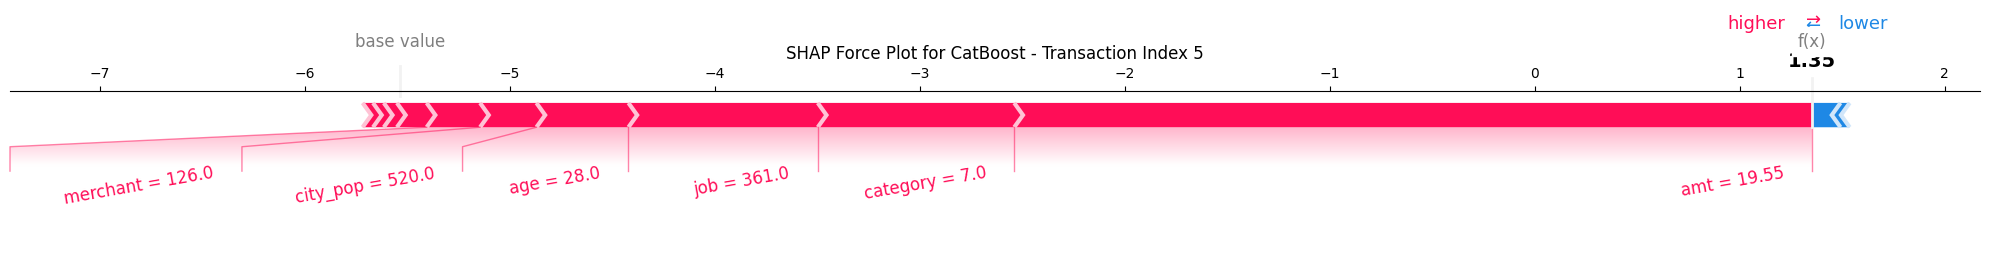

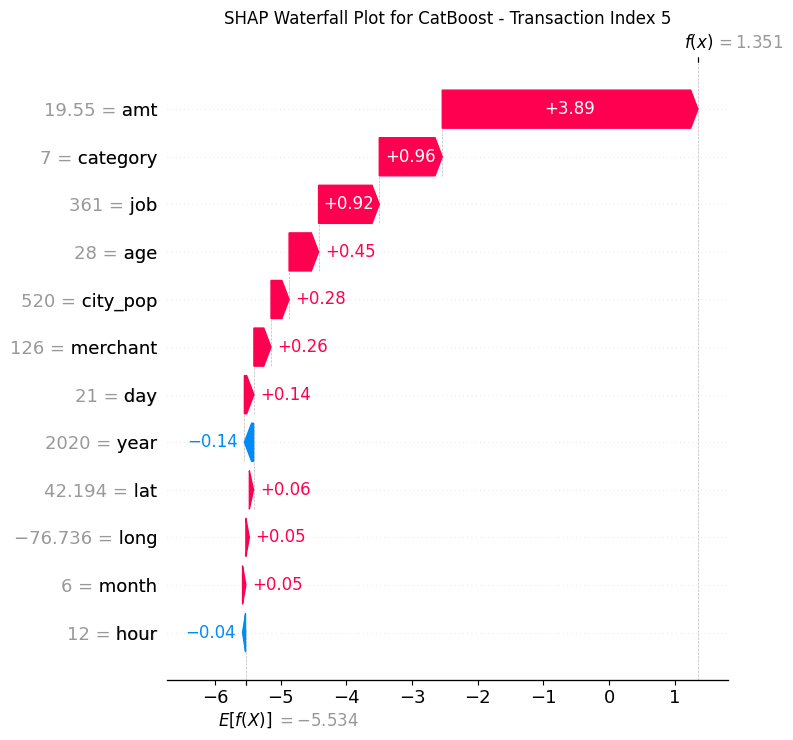


Generating SHAP Summary Plot for the selected flagged transactions...


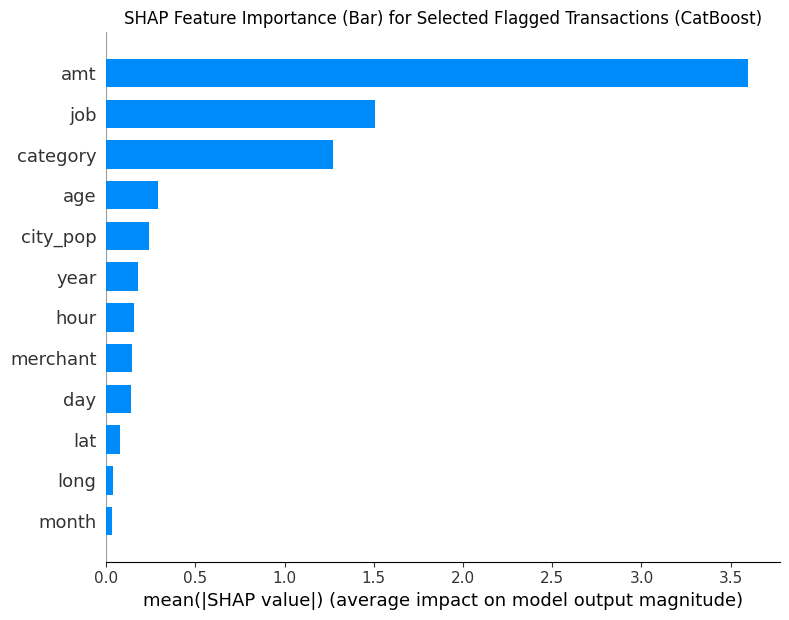

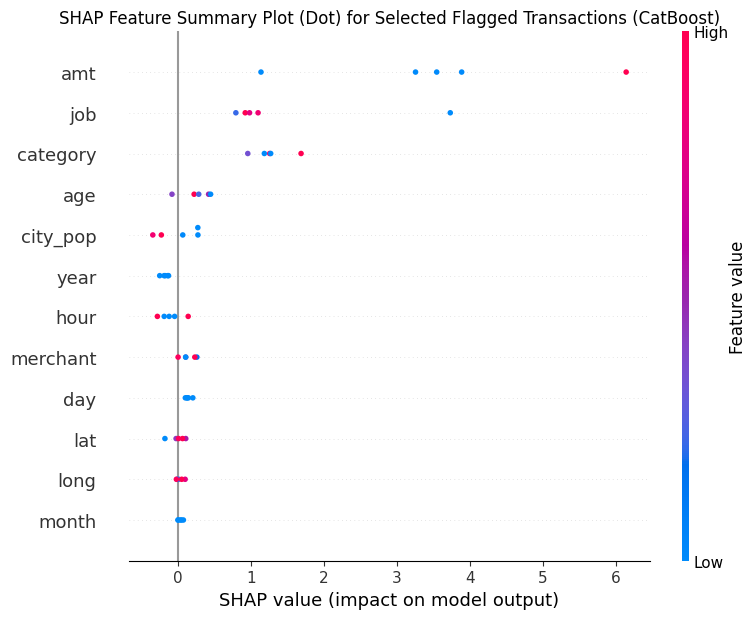


--- Interpreting SHAP plots for CatBoost ---
- Force Plot: Shows features pushing the prediction score higher (red, towards fraud) or lower (blue, towards non-fraud) from the base value for a single instance.
  The 'output value' is the model's raw output score (often log-odds for classification).
- Waterfall Plot: Decomposes a single prediction, showing the positive and negative contributions of each feature from the base E[f(X)] to f(x).
- Summary Plot (Bar): Ranks features by the mean absolute SHAP value across the analyzed samples (here, the selected flagged transactions). Higher is more important.
- Summary Plot (Dot): Shows SHAP values for each feature for every sample. Points are colored by feature value (high/low) and spread along x-axis to show impact on prediction.

--- End of CatBoost Detailed Transaction Analysis ---


In [ ]:
# Step 5: SHAP Analysis (if transactions were selected and SHAP is installed)
if not selected_transactions_for_analysis.empty:
    try:
        import shap
        # shap.initjs() # Uncomment if running in a Jupyter Notebook environment and plots are not showing up directly under cell.

        print("\n--- SHAP Analysis for Selected CatBoost Fraudulent Transactions ---")

        explainer = shap.TreeExplainer(cb_model_no_tune) # Use the correct model

        # Extract only the feature columns from selected_transactions_for_analysis,
        # ensuring they match the columns X_test_cb that the model expects.
        features_for_shap = selected_transactions_for_analysis[X_test_cb.columns]

        print(f"Calculating SHAP values for {len(features_for_shap)} selected transactions...")
        shap_values = explainer.shap_values(features_for_shap) # SHAP values for the positive class
        print("SHAP values calculation complete.")

        base_value = explainer.expected_value
        if isinstance(base_value, (list, np.ndarray)) and len(base_value) > 1:
             print(f"SHAP explainer.expected_value is an array: {base_value}. Assuming value for positive class is appropriate for binary case.")
             # For binary classification, often the shap_values and expected_value refer to the positive class's score.
             # If shap_values is a list of two arrays (one for each class), pick shap_values[1]
             # If base_value is also a list, pick base_value[1]
             # TreeExplainer for CatBoost usually returns single array for shap_values (for positive class)
             # and single base_value if it's binary classification. Check docs for specific behavior.
             # Assuming shap_values and base_value are already for the positive class for simplicity based on common usage.
             pass # This often implies it's the base for the positive class, or SHAP handles it.
                     # If this leads to errors or misinterpretations, detailed checking of SHAP documentation for this specific model version is needed.
        elif isinstance(base_value, (list, np.ndarray)): # It's an array but length 1
            base_value = base_value[0]


        # --- SHAP plots for the *first* selected transaction ---
        if len(features_for_shap) > 0:
            print(f"\nGenerating SHAP plots for the first selected transaction (Index: {features_for_shap.index[0]}):")

            # Force Plot
            plt.figure() # Create a new figure to ensure plot is not overlaid
            # If force_plot fails with " πρέπει να καθορίσετε το link='logit' ή να περάσετε μια συνάρτηση μετασχηματισμού" (you need to specify link='logit' or pass a transformation function)
            # this means the output is in log-odds. Matplotlib=True typically handles this.
            shap.force_plot(base_value,
                            shap_values[0,:], # SHAP values for the first instance
                            features_for_shap.iloc[0,:], # Feature values for the first instance
                            matplotlib=True, show=False, text_rotation=10) # show=False to control display with plt.show() later
            plt.title(f"SHAP Force Plot for CatBoost - Transaction Index {features_for_shap.index[0]}")
            plt.tight_layout()
            plt.show()

            # Waterfall Plot
            # Create a SHAP Explanation object for modern waterfall plot for better output and more options
            shap_explanation_instance = shap.Explanation(
                values=shap_values[0,:],
                base_values=base_value,
                data=features_for_shap.iloc[0,:].values, # Original feature values
                feature_names=features_for_shap.columns.tolist()
            )
            plt.figure()
            shap.waterfall_plot(shap_explanation_instance, max_display=15, show=False) # Display top 15 features
            plt.title(f"SHAP Waterfall Plot for CatBoost - Transaction Index {features_for_shap.index[0]}")
            plt.tight_layout()
            plt.show()
        else:
            print("No transactions to generate individual SHAP plots for.")

        # --- SHAP Summary Plot for all selected fraudulent transactions ---
        if len(features_for_shap) > 0:
            print("\nGenerating SHAP Summary Plot for the selected flagged transactions...")
            plt.figure()
            shap.summary_plot(shap_values, features_for_shap, plot_type="bar", show=False, max_display=15)
            plt.title(f"SHAP Feature Importance (Bar) for Selected Flagged Transactions (CatBoost)")
            plt.tight_layout()
            plt.show()

            plt.figure() # New figure for dot summary plot
            shap.summary_plot(shap_values, features_for_shap, plot_type="dot", show=False, max_display=15) # Default plot_type is dot
            plt.title(f"SHAP Feature Summary Plot (Dot) for Selected Flagged Transactions (CatBoost)")
            plt.tight_layout()
            plt.show()
        else:
            print("No transactions to generate SHAP summary plots for.")


        print("\n--- Interpreting SHAP plots for CatBoost ---")
        print("- Force Plot: Shows features pushing the prediction score higher (red, towards fraud) or lower (blue, towards non-fraud) from the base value for a single instance.")
        print("  The 'output value' is the model's raw output score (often log-odds for classification).")
        print("- Waterfall Plot: Decomposes a single prediction, showing the positive and negative contributions of each feature from the base E[f(X)] to f(x).")
        print("- Summary Plot (Bar): Ranks features by the mean absolute SHAP value across the analyzed samples (here, the selected flagged transactions). Higher is more important.")
        print("- Summary Plot (Dot): Shows SHAP values for each feature for every sample. Points are colored by feature value (high/low) and spread along x-axis to show impact on prediction.")

    except ImportError:
        print("\nSHAP library not found. Please install it (`pip install shap`) to run SHAP analysis.")
        print("You can typically install it by running: !pip install shap in a notebook cell.")
    except Exception as e:
        print(f"\nAn error occurred during SHAP analysis: {e}")
        print("  Possible causes: SHAP/CatBoost version incompatibilities, issues with `explainer.expected_value`, or data mismatch.")
        if 'explainer' in locals() and hasattr(explainer, 'expected_value'):
             print(f"  Type of explainer.expected_value: {type(explainer.expected_value)}")
             print(f"  Value of explainer.expected_value: {explainer.expected_value}")
        print("  Ensure `features_for_shap` has the same columns and dtypes as `X_test_cb` used for model training/prediction.")

else: # This 'else' corresponds to 'if not selected_transactions_for_analysis.empty:'
    if not flagged_fraudulent_transactions.empty: # This case means flagged_transactions was not empty, but selected_transactions_for_analysis became empty (shouldn't happen with current selection logic)
        print("\nNo transactions were ultimately selected for SHAP analysis, even though some transactions were initially flagged as fraudulent.")

print("\n--- End of CatBoost Detailed Transaction Analysis ---")

In [ ]:
#LIME for AUTOENCODER

In [ ]:
# Insert this code block AFTER your Autoencoder model training and evaluation
# in the scienaptic2.ipynb notebook.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # For potential plotting of LIME explanations

# Ensure LIME is installed. If not, run in a separate cell: !pip install lime
try:
    import lime
    import lime.lime_tabular
except ImportError:
    print("LIME library not found. Please install it by running: !pip install lime")
    raise

# --- Autoencoder: Detailed Transaction Analysis using LIME ---
print("\n--- Autoencoder: Detailed Transaction Analysis using LIME ---")

# Step 1: Consolidate Autoencoder predictions and actuals
# It's assumed X_test, y_test, mse_test, final_threshold are available from your AE section.
ae_results_df = X_test.copy() # Start with original unscaled test features.
# Ensure y_test values are correctly aligned, especially if it's a pandas Series.
ae_results_df['true_label'] = y_test.values if isinstance(y_test, pd.Series) else y_test
ae_results_df['reconstruction_error_ae'] = mse_test
ae_results_df['predicted_label_ae'] = (mse_test > final_threshold).astype(int)

# Step 2: Filter for transactions flagged as fraudulent by the Autoencoder
ae_flagged_fraudulent = ae_results_df[ae_results_df['predicted_label_ae'] == 1]
print(f"\nAutoencoder flagged {len(ae_flagged_fraudulent)} out of {len(ae_results_df)} test transactions as fraudulent.")

# Step 3: Select up to 5 transactions for LIME analysis
num_to_explain = 5
ae_to_explain_df = pd.DataFrame() # Initialize an empty DataFrame

if ae_flagged_fraudulent.empty:
    print("Autoencoder did not flag any transactions as fraudulent. Cannot perform LIME analysis for flagged transactions.")
else:
    if len(ae_flagged_fraudulent) < num_to_explain:
        print(f"Warning: Autoencoder flagged fewer than {num_to_explain} transactions ({len(ae_flagged_fraudulent)}). Explaining all of them.")
        ae_to_explain_df = ae_flagged_fraudulent
    else:
        # Select the first N flagged transactions. You could also sample or sort by error.
        print(f"Selecting the first {num_to_explain} transactions flagged by Autoencoder for LIME analysis.")
        ae_to_explain_df = ae_flagged_fraudulent.head(num_to_explain)

    print(f"\nDetails of selected transactions flagged by Autoencoder for LIME analysis:")
    for i, (index, row) in enumerate(ae_to_explain_df.iterrows()):
        print(f"\nTransaction {i+1} (Original Test Set Index: {index}):")
        # Display some key features. Customize based on your dataset.
        print(f"  Features (sample): amt={row.get('amt', 'N/A')}, category='{row.get('category', 'N/A')}', age={row.get('age', 'N/A')}, job='{row.get('job', 'N/A')}'")
        print(f"  Reconstruction Error: {row['reconstruction_error_ae']:.6f}")
        print(f"  True Label: {'Fraud' if row['true_label'] == 1 else 'Non-Fraud'}")
        print(f"  AE Predicted Label: {'Fraud' if row['predicted_label_ae'] == 1 else 'Non-Fraud'}") # Should be Fraud
        if row['true_label'] == 0 and row['predicted_label_ae'] == 1:
            print("  Analysis Type: This is a FALSE POSITIVE (flagged by AE).")
        elif row['true_label'] == 1 and row['predicted_label_ae'] == 1:
            print("  Analysis Type: This is a TRUE POSITIVE (flagged by AE).")

# Step 4: LIME Setup and Explanation (only if there are transactions to explain)
if not ae_to_explain_df.empty:
    # Define the prediction function for LIME specifically for the Autoencoder
    # This function will take unscaled data, process it through the AE, and return pseudo-probabilities.
    def ae_predict_proba_for_lime(data_unscaled_np_lime):
        # Ensure input is a 2D NumPy array
        if data_unscaled_np_lime.ndim == 1:
            data_unscaled_np_lime = data_unscaled_np_lime.reshape(1, -1)

        # Scale the data using the same scaler used for the Autoencoder
        data_scaled_np_lime = scaler_ae.transform(data_unscaled_np_lime)

        # Get reconstructions and calculate MSE
        # Add verbose=0 to simple_autoencoder.predict if it prints too much during LIME's sampling
        reconstructions_np_lime = simple_autoencoder.predict(data_scaled_np_lime, verbose=0)
        mse_np_lime = np.mean(np.power(data_scaled_np_lime - reconstructions_np_lime, 2), axis=1)

        # Convert MSE to pseudo-probabilities [P(Non-Fraud), P(Fraud)]
        # Using a sigmoid function centered around the threshold can provide smoother probabilities for LIME
        k_sigmoid = 10 # Steepness of the sigmoid; adjust if necessary based on MSE range and threshold
        prob_fraud_np_lime = 1 / (1 + np.exp(-k_sigmoid * (mse_np_lime - final_threshold)))

        # LIME expects probabilities for all classes
        probs_np_lime = np.zeros((len(mse_np_lime), 2))
        probs_np_lime[:, 1] = prob_fraud_np_lime      # Probability of Fraud (Class 1)
        probs_np_lime[:, 0] = 1 - prob_fraud_np_lime  # Probability of Non-Fraud (Class 0)
        return probs_np_lime

    # Initialize LIME Tabular Explainer
    # X_train_normal should be your unscaled DataFrame of normal training data
    # Ensure X_train_normal is a Pandas DataFrame as defined in your AE section
    if not isinstance(X_train_normal, pd.DataFrame):
        raise ValueError("X_train_normal must be a Pandas DataFrame for LIME setup as used here, to provide feature names correctly.")

    print("\nInitializing LIME Explainer for Autoencoder...")
    lime_explainer_ae = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_train_normal.values,        # Background dataset (NumPy array of unscaled normal data)
        feature_names=X_train_normal.columns.tolist(), # List of feature names
        class_names=['Non-Fraud', 'Fraud'],         # Class names for LIME output
        mode='classification',                      # LIME mode
        random_state=42                             # For reproducibility of LIME's sampling process
    )
    print("LIME Explainer for Autoencoder initialized.")

    print("\n--- LIME Explanations for Selected Autoencoder-Flagged Transactions ---")
    # Explain each selected transaction
    for i in range(len(ae_to_explain_df)):
        instance_to_explain_series = ae_to_explain_df.iloc[i]
        # LIME's explain_instance expects a 1D NumPy array of feature values (unscaled)
        # Ensure these are the same features LIME was trained on (from X_train_normal.columns)
        instance_features_unscaled_np = instance_to_explain_series[X_train_normal.columns].values

        original_index = ae_to_explain_df.index[i] # Get the original index from X_test
        true_label_text = 'Fraud' if instance_to_explain_series['true_label'] == 1 else 'Non-Fraud'

        print(f"\nGenerating LIME explanation for Transaction {i+1} (Original Test Set Index: {original_index}):")
        print(f"  AE Predicted: Fraud, True Label: {true_label_text}, AE Reconstruction Error: {instance_to_explain_series['reconstruction_error_ae']:.6f}")

        try:
            # We want to explain why the prediction is 'Fraud' (class index 1)
            lime_explanation_ae = lime_explainer_ae.explain_instance(
                data_row=instance_features_unscaled_np,
                predict_fn=ae_predict_proba_for_lime,
                num_features=10,  # Show top N features contributing to the explanation
                labels=(1,)       # Explain only the 'Fraud' class (index 1)
            )

            print("  LIME Explanation (features contributing to Autoencoder's 'Fraud' prediction):")
            explanation_list = lime_explanation_ae.as_list(label=1) # Get explanation for the 'Fraud' class
            if not explanation_list:
                print("    LIME could not identify strong contributing features for the 'Fraud' class for this instance.")
            else:
                for feature, weight in explanation_list:
                    print(f"    Feature: {feature}, Weight: {weight:.4f} (Positive weight -> increases P(Fraud))")

            # --- Optional: Display LIME plot (works best in Jupyter Notebook) ---
            # Make sure matplotlib is imported as plt
            # fig = lime_explanation_ae.as_pyplot_figure(label=1)
            # plt.title(f"LIME Explanation for Autoencoder - Tx Index {original_index} (True: {true_label_text})")
            # plt.xlabel("Feature Weights (Contribution to P(Fraud))")
            # plt.ylabel("Features")
            # plt.tight_layout()
            # plt.show()
            # Alternatively, for direct notebook output:
            # lime_explanation_ae.show_in_notebook(show_table=True, show_all=False, label_to_show=1)


        except Exception as e:
            print(f"    Error during LIME explanation for transaction (index {original_index}): {e}")
            print(f"    Instance data shape: {instance_features_unscaled_np.shape}")

# This 'else' pairs with 'if not ae_to_explain_df.empty():'
else:
    if not ae_flagged_fraudulent.empty() and ae_to_explain_df.empty():
         # This case should ideally not be reached if selection logic is correct
         print("\nError: Transactions were flagged by AE but none were selected for LIME explanation. Review selection logic.")


print("\n\n--- Discussion Points for Autoencoder Model Behavior (Based on LIME and Results) ---")
print("\n1. For False Positives (AE predicted Fraud, but True Label was Non-Fraud):")
print("   - Look at the LIME explanations. Which specific feature values did LIME identify as contributing to the 'Fraud' prediction (i.e., high reconstruction error)?")
print("   - Are these features truly anomalous, or just rare/edge cases within the normal data distribution that the Autoencoder wasn't perfectly trained to reconstruct?")
print("   - Example: A 'Non-Fraud' transaction with an unusually high 'amt' for a typically low-amount 'category' might get a high reconstruction error.")
print("   - This helps understand if the Autoencoder is overly sensitive or if the `final_threshold` might be too aggressive (too low).")
print("\n2. For True Positives (AE predicted Fraud, and True Label was also Fraud):")
print("   - LIME should highlight features whose values are genuinely different from the patterns seen in the non-fraudulent training data (`X_train_normal`).")
print("   - The explanation should ideally align with why a human might suspect fraud (e.g., extremely high transaction amount, unusual merchant, atypical time for that user).")
print("   - This validates that the Autoencoder is correctly identifying deviations that correspond to actual fraud.")
print("\n3. Interpreting LIME Weights for Autoencoder Anomalies:")
print("   - LIME explains the local model it builds around the prediction. For the AE, a positive weight for a feature (for the 'Fraud' class) means that feature's value pushed the transaction towards being classified as an anomaly (i.e., contributed to a higher reconstruction error, which then crossed the threshold).")
print("   - Consider the actual value of the feature for the specific transaction and compare it to typical values in `X_train_normal`.")
print("\n4. General Insights into Autoencoder Behavior:")
print("   - By examining several LIME explanations, you can start to see patterns in what the Autoencoder considers 'abnormal'.")
print("   - For example, does it consistently flag transactions with high values for certain features, or combinations of features that rarely occur in the normal data?")
print("\n5. Limitations to Consider:")
print("   - LIME provides local explanations (per instance) and might not perfectly reflect the global decision-making of the Autoencoder.")
print("   - The pseudo-probabilities generated from MSE for LIME are a proxy; the AE itself doesn't output probabilities.")
print("   - The stability and quality of LIME explanations can vary. Consider running `explain_instance` multiple times if `random_state` in `LimeTabularExplainer` is not set, or trying different LIME parameters.")

print("\n--- End of Autoencoder Detailed Transaction Analysis with LIME ---")

In [6]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b9b5dab5305fbcfc4a0d9d81c4f7984de8678ce12bb14ea5af4ca2fb39fa6017
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
